# <span style="color: Purple; font-size: Large; text-align: center;"> <h1> Exploring Popular App Categories on Google Play Store </h1>

<center>The aim of this project is to discern the types of apps that tend to be popular on the Google Play Store. Our team is affiliated with a company that produces free apps and generates revenue through advertisements. By comprehending which app categories are in high demand, we aim to assist our developers in creating apps that not only draw more users but also generate increased revenue. We will analyze data sourced from the Google Play Store to unveil patterns and user preferences. This strategic approach will enable us to make informed decisions regarding the types of apps we choose to develop.</center>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read datasets into pandas DataFrame objects

android_df = pd.read_csv("googleplaystore.csv")

In [3]:
# Explore the data using pandas methods
android_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
android_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
android_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# explore the catagories to know how many apps are avilable

android_df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

# Inspect the Anomalies

In [7]:
android_df[android_df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


# Clean the Data

In [8]:
android_df[android_df["Category"] == "1.9"].values

array([['Life Made WI-Fi Touchscreen Photo Frame', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', nan, 'February 11, 2018',
        '1.0.19', '4.0 and up', nan]], dtype=object)

In [9]:
clean_list = ['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', '1.9', 19.0, '3.0M',
        '1,000+', 'Free', '0', 'Everyone', 'Lifestyle ', 'February 11, 2018',
        '1.0.19', '4.0 and up', ]
clean_list

['Life Made WI-Fi Touchscreen Photo Frame',
 'LIFESTYLE',
 '1.9',
 19.0,
 '3.0M',
 '1,000+',
 'Free',
 '0',
 'Everyone',
 'Lifestyle ',
 'February 11, 2018',
 '1.0.19',
 '4.0 and up']

In [10]:
android_df[android_df["Category"] == "1.9"] = clean_list

In [11]:
android_df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               383
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [12]:
# explore the App column

app_count = android_df["App"].value_counts()
app_count

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

# Removing Duplicate Entries

# Part One

If we explore tha data long enough, we'll find that some apps have more than one entry. For Instance, the Instagram has four entries

In [13]:
app_count[app_count > 1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
                                                    ..
Transenger – Ts Dating and Chat for Free             2
Random Video Chat                                    2
Clover Dating App                                    2
Docs To Go™ Free Office Suite                        2
English Dictionary - Offline                         2
Name: App, Length: 798, dtype: int64

In [14]:
"Instagram" in app_count[app_count > 1].index

True

In [15]:
android_df[android_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [16]:
# check for duplicate raws based on the 'APP' column making all duplicates as True
duplicate_apps_df = android_df[android_df.duplicated(subset = ["App"], keep= False)]

duplicate_apps_df[duplicate_apps_df["App"] == "Instagram"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [17]:
# Number of duplicate_apps
num_duplicate_apps = duplicate_apps_df["App"].nunique()
num_duplicate_apps

798

In [18]:
duplicate_apps_df.shape

(1979, 13)

In [19]:
android_df["App"].nunique()

9660

In [20]:
android_df.shape[0]

10841

In [21]:
10841-9660

1181

In [22]:
# group by 'App' and get the maximize number of reviews for each app
max_review = android_df.groupby('App')["Reviews"].max()

In [23]:
max_review["Instagram"]

'66577446'

In [24]:
max_review

App
"i DT" Fútbol. Todos Somos Técnicos.                   27
+Download 4 Instagram Twitter                       40467
- Free Comics - Comic Apps                            115
.R                                                    259
/u/app                                                573
                                                    ...  
뽕티비 - 개인방송, 인터넷방송, BJ방송                               414
💎 I'm rich                                            718
💘 WhatsLov: Smileys of love, stickers and GIF       22098
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661
Name: Reviews, Length: 9660, dtype: object

In [25]:
# to create an empty list to store cleansed data
android_clean = []

# create an empty list to keep track of already added apps
alraedy_added = []

#Iteratenthrough row in the DataFrame
for index, row in android_df.iterrows():
    name = row["App"]
    n_reviews = row["Reviews"]
    
# check if the current app has the maximum number of reviews and has not been added before
    if(max_review[name] == n_reviews) and (name not in alraedy_added):
        android_clean.append(row) # add the app to the cleaned list
        alraedy_added.append(name) # add the app name o the list of already added apps

In [26]:
len(android_clean)

9660

In [27]:
android_clean = pd.DataFrame(android_clean)

In [28]:
android_clean.shape[0]

9660

In [29]:
alraedy_added

['Photo Editor & Candy Camera & Grid & ScrapBook',
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
 'Sketch - Draw & Paint',
 'Pixel Draw - Number Art Coloring Book',
 'Paper flowers instructions',
 'Smoke Effect Photo Maker - Smoke Editor',
 'Infinite Painter',
 'Garden Coloring Book',
 'Kids Paint Free - Drawing Fun',
 'Text on Photo - Fonteee',
 'Name Art Photo Editor - Focus n Filters',
 'Tattoo Name On My Photo Editor',
 'Mandala Coloring Book',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 'Learn To Draw Kawaii Characters',
 'Photo Designer - Write your name with shapes',
 '350 Diy Room Decor Ideas',
 'FlipaClip - Cartoon animation',
 'ibis Paint X',
 'Logo Maker - Small Business',
 "Boys Photo Editor - Six Pack & Men's Suit",
 'Superheroes Wallpapers | 4K Backgrounds',
 'HD Mickey Minnie Wallpapers',
 'Harley Quinn wallpapers HD',
 'Colorfit - Drawing & Coloring',
 'Animated Photo Editor',
 'Pencil Sketch Drawing',
 'Easy Realistic Drawing Tutorial',
 'Pink Silver 

# Removing Non-English Apps

# Part One

If you explore the dataset enough, you'll notice the names of some of the apps suggest they are not directed toward an Enlgish-speaking audience. Below we see a couple of example from both datasets:

In [30]:
def is_english(app_name):
    frst = []
    for i in app_name:
        if ord(i) > 127:
            frst.append(False)
        else:
            frst.append(True)
            
    check = set(frst)
    
    if False in check:
        return False
    else:
        return True

In [31]:
is_english("Roblox")

True

# For English apps with non Ascii

In [32]:
def is_english(app_name):
    frst = []
    for i in app_name:
        if ord(i) > 127:
            frst.append(False)
        else:
            frst.append(True)
            
    non_ascii = 0
    for j in frst:
        if j == False:
            non_ascii +=1
            
    check = set(frst)
    
    if non_ascii > 3:
        
        return False
    else:
        return True

In [33]:
android_english = android_clean[android_clean["App"].apply(is_english)]

In [34]:
android_english.shape

(9615, 13)

# Isolating the Free Apps

As we mentioned in the introduction, we only build apps that are free to download and install, and our main source of revenue consists of in-app ads. Our data sets contain both free and non-free apps, and we'll need to isolate only the free apps for our analysis. Below, we isolate the free apps for both our data sets.

In [35]:
android_english["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$11.99', '$79.99', '$16.99', '$14.99', '$1.00',
       '$29.99', '$12.99', '$2.49', '$24.99', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [36]:
android_final = android_english[android_english["Price"] == "0"]

In [37]:
android_final.shape

(8863, 13)

# Analysis on most comman apps by genere

In [38]:
android_final["Category"].value_counts(normalize = True)*100

FAMILY                 18.932641
GAME                    9.691978
TOOLS                   8.450863
BUSINESS                4.592125
LIFESTYLE               3.915153
PRODUCTIVITY            3.892587
FINANCE                 3.700779
MEDICAL                 3.520253
SPORTS                  3.396141
PERSONALIZATION         3.317161
COMMUNICATION           3.238181
HEALTH_AND_FITNESS      3.080221
PHOTOGRAPHY             2.944827
NEWS_AND_MAGAZINES      2.798150
SOCIAL                  2.662755
TRAVEL_AND_LOCAL        2.335552
SHOPPING                2.245289
BOOKS_AND_REFERENCE     2.143744
DATING                  1.861672
VIDEO_PLAYERS           1.793975
MAPS_AND_NAVIGATION     1.399075
FOOD_AND_DRINK          1.241115
EDUCATION               1.173418
ENTERTAINMENT           0.959043
LIBRARIES_AND_DEMO      0.936477
AUTO_AND_VEHICLES       0.925195
HOUSE_AND_HOME          0.823649
WEATHER                 0.801083
EVENTS                  0.710820
PARENTING               0.654406
ART_AND_DE

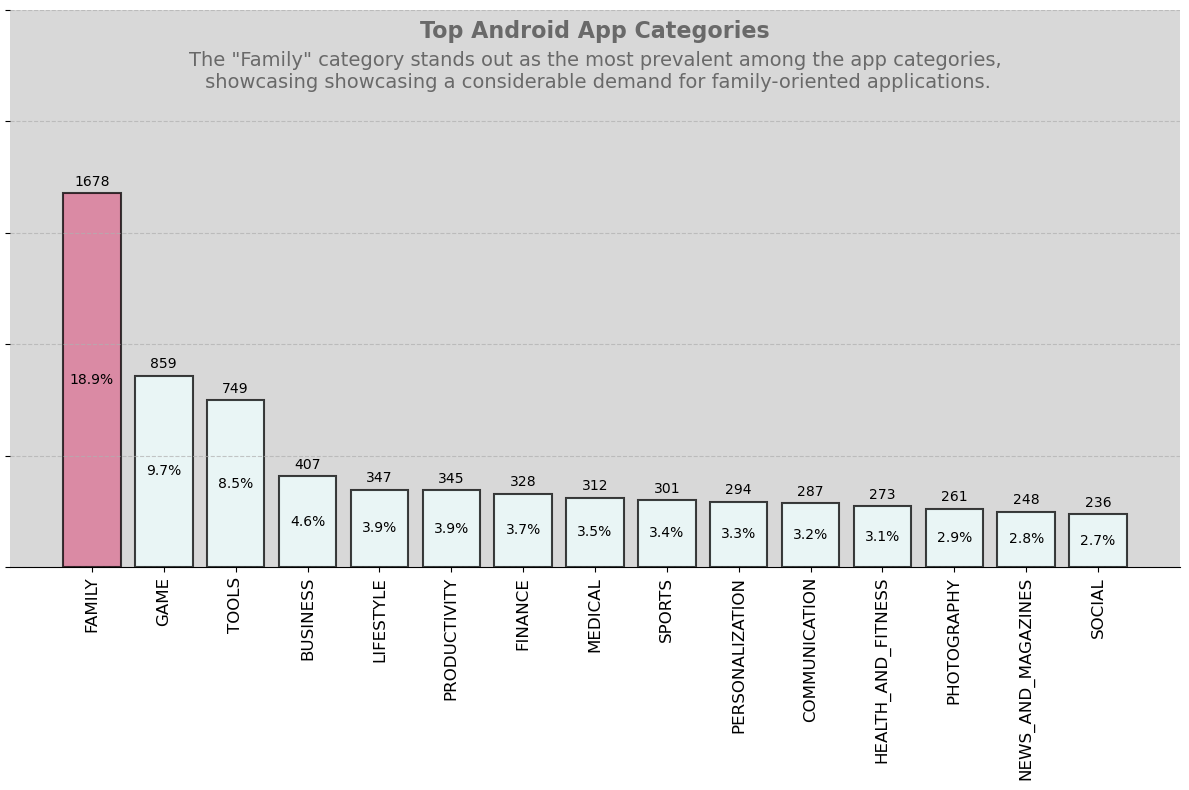

In [39]:
# Data
categories = android_final["Category"].value_counts().index[:15]
counts = android_final["Category"].value_counts()[:15]
percentage = round(android_final["Category"].value_counts(normalize=True) * 100, 1)[:15]

# Create stylish bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(categories, counts, color="azure", alpha=0.75, edgecolor="black", linewidth=1.5)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="")
plt.xticks(fontsize=12)  # Customized tick labels
plt.yticks(range(0, 3000, 500), [], fontsize=12)  # Customized tick labels a

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("palevioletred")
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, "%d" % int(height), ha="center", va="bottom", fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{perc}%', ha="center", va="center", fontsize=10, color="black")

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#d8d8d8")

# Adding chart title inside the chart
plt.text(0.5, 0.95, 'Top Android App Categories', horizontalalignment='center', fontsize=16,
         transform=plt.gca().transAxes, color='dimgrey', fontweight='bold')

# Adding a conclusion inside the chart
plt.text(0.5, 0.86, 'The "Family" category stands out as the most prevalent among the app categories,\n showcasing showcasing a considerable demand for family-oriented applications.', horizontalalignment="center", fontsize=14, transform=plt.gca().transAxes,
         color='dimgrey')

# Removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()  # adjust layout to prevent clipping

plt.show()


In [40]:
android_final[android_final["Category"] == "FAMILY"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 23, 2018",1.9.3901,4.0.3 and up
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,"July 17, 2018",1.49,4.0.3 and up
2019,Mahjong,FAMILY,4.5,33983,22M,"5,000,000+",Free,0,Everyone,Puzzle;Brain Games,"August 2, 2018",1.24.3181,4.0.3 and up
2020,Super ABC! Learning games for kids! Preschool ...,FAMILY,4.6,20267,46M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 16, 2018",1.1.6.7,4.1 and up
2021,Toy Pop Cubes,FAMILY,4.5,5761,21M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,"July 4, 2018",1.8.3181,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


# Most Popular Apps by Genre Google Play

For the Google Play market, we actually have data about installs, so we should be able to get a
clearer picture about popularity. However the number of install don't seem precise enough -
we can see that most values are open-ended (100+, 1000+, 5000+, etc)

In [41]:
print(android_final.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [42]:
android_final["Installs"].value_counts(normalize= True)* 100

1,000,000+        15.739592
100,000+          11.553650
10,000,000+       10.515627
10,000+           10.199707
1,000+             8.405732
100+               6.916394
5,000,000+         6.837414
500,000+           5.573733
50,000+            4.772650
5,000+             4.513145
10+                3.542818
500+               3.249464
50,000,000+        2.290421
100,000,000+       2.121178
50+                1.918086
5+                 0.789800
1+                 0.507729
500,000,000+       0.270789
1,000,000,000+     0.225657
0+                 0.045131
0                  0.011283
Name: Installs, dtype: float64

In [43]:
android_final["Installs_int"] = android_final["Installs"].str.replace(",", "").str.replace("+", "").astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_9808\1127918135.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  android_final["Installs_int"] = android_final["Installs"].str.replace(",", "").str.replace("+", "").astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_9808\1127918135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  android_final["Installs_int"] = android_final["Installs"].str.replace(",", "").str.replace("+", "").astype(int)


In [44]:
android_final["Installs_int"] 

0           10000
2         5000000
3        50000000
4          100000
5           50000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs_int, Length: 8863, dtype: int32

In [45]:
install_frq = android_final["Installs_int"].value_counts().sort_index()
install_frq =install_frq[install_frq.index > 500]
install_frq

1000           745
5000           400
10000          904
50000          423
100000        1024
500000         494
1000000       1395
5000000        606
10000000       932
50000000       203
100000000      188
500000000       24
1000000000      20
Name: Installs_int, dtype: int64

In [46]:
# In percentage

install_freq = round(android_final["Installs_int"].value_counts(normalize=True)*100,2).sort_index()
install_freq =install_freq[install_freq.index > 500]
install_freq

1000           8.41
5000           4.51
10000         10.20
50000          4.77
100000        11.55
500000         5.57
1000000       15.74
5000000        6.84
10000000      10.52
50000000       2.29
100000000      2.12
500000000      0.27
1000000000     0.23
Name: Installs_int, dtype: float64

In [47]:
# to check actual value insights
def alphanummeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B' # 0f means 0 fraction value
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'


In [48]:
install_frq.index = install_frq.index.map(alphanummeric_units)
install_frq

1K       745
5K       400
10K      904
50K      423
100K    1024
500K     494
1M      1395
5M       606
10M      932
50M      203
100M     188
500M      24
1B        20
Name: Installs_int, dtype: int64

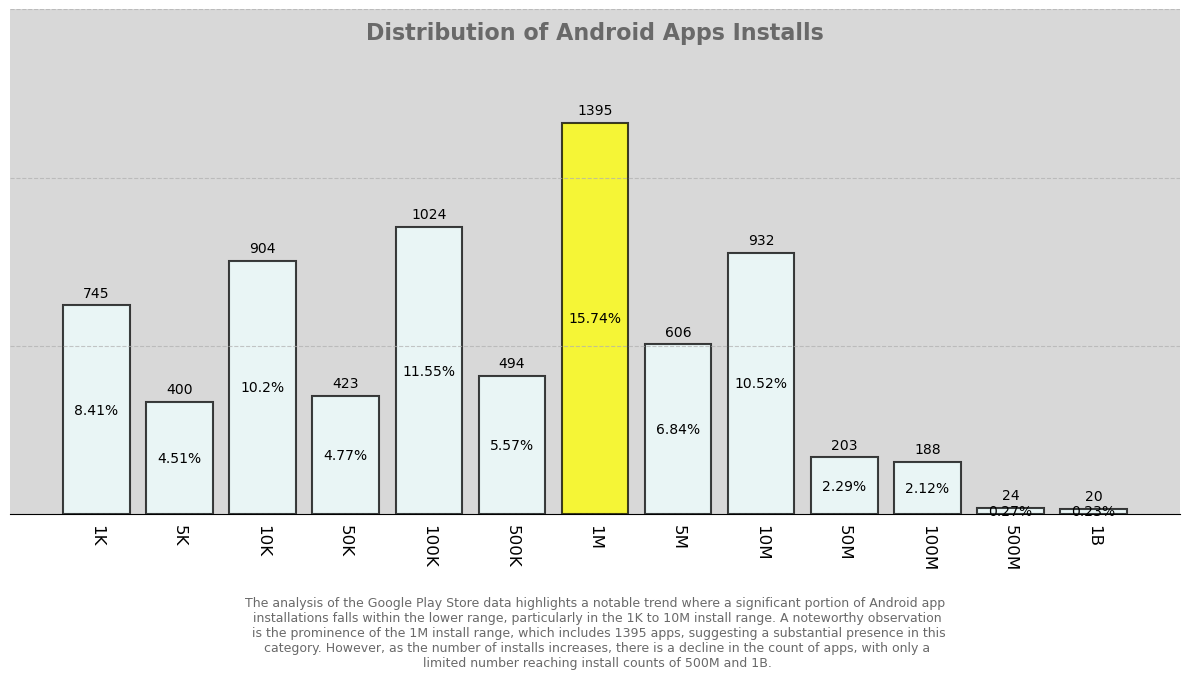

In [49]:
# Data
categories = install_frq.index
counts = install_frq.values
percentage = install_freq.values

# Create stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color="azure", alpha=0.75, edgecolor="black", linewidth=1.5)

plt.xticks(rotation=-90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="")
plt.xticks(fontsize=12)  # Customized tick labels
plt.yticks(range(0, 2000, 600), [], fontsize=12)  # Customized tick labels a
plt.tick_params(bottom = 0, left = 0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("yellow")
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, perc in zip(bars, percentage):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, "%d" % int(height), ha="center", va="bottom", fontsize=10)
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{perc}%', ha="center", va="center", fontsize=10, color="black")

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#d8d8d8")

# Adding chart title inside the chart
plt.text(0.5, 0.94, 'Distribution of Android Apps Installs', horizontalalignment='center', fontsize=16, transform=plt.gca().transAxes, color='dimgrey', fontweight='bold')

# Adding a conclusion inside the chart
plt.text(0.5, -0.30, '''The analysis of the Google Play Store data highlights a notable trend where a significant portion of Android app\n installations falls within the lower range, particularly in the 1K to 10M install range. A noteworthy observation\n  is the prominence of the 1M install range, which includes 1395 apps, suggesting a substantial presence in this\n category. However, as the number of installs increases, there is a decline in the count of apps, with only a\n limited number reaching install counts of 500M and 1B.''',
         horizontalalignment="center", fontsize=9, transform=plt.gca().transAxes, color='dimgrey')

# Removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()  # adjust layout to prevent clipping

plt.show()

In [50]:
categories_android = android_final["Category"].unique()
categories_android

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [51]:
pd.pivot_table(android_final, values='Installs_int', index='Category', aggfunc='mean')

,Installs_int
Category,
ART_AND_DESIGN,1.986335e+06
AUTO_AND_VEHICLES,6.473178e+05
BEAUTY,5.131519e+05
BOOKS_AND_REFERENCE,8.767812e+06
BUSINESS,1.712290e+06
COMICS,8.176573e+05
COMMUNICATION,3.845612e+07
DATING,8.540288e+05
EDUCATION,1.820673e+06


In [52]:
# To displayDataFrame without scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [53]:
categories_installs = pd.pivot_table(android_final, values = 'Installs_int', index="Category", aggfunc = "mean")
categories_installs = categories_installs.sort_values(by = "Installs_int", ascending = False)
categories_installs = categories_installs["Installs_int"]
categories_installs

Category
COMMUNICATION         38456119
VIDEO_PLAYERS         24727872
SOCIAL                23253652
PHOTOGRAPHY           17805628
PRODUCTIVITY          16787331
GAME                  15560966
TRAVEL_AND_LOCAL      13984078
ENTERTAINMENT         11640706
TOOLS                 10682301
NEWS_AND_MAGAZINES     9549178
BOOKS_AND_REFERENCE    8767812
SHOPPING               7036877
PERSONALIZATION        5201483
WEATHER                5074486
HEALTH_AND_FITNESS     4188822
MAPS_AND_NAVIGATION    4056942
FAMILY                 3694276
SPORTS                 3638640
ART_AND_DESIGN         1986335
FOOD_AND_DRINK         1924898
EDUCATION              1820673
BUSINESS               1712290
LIFESTYLE              1433676
FINANCE                1387692
HOUSE_AND_HOME         1331541
DATING                  854029
COMICS                  817657
AUTO_AND_VEHICLES       647318
LIBRARIES_AND_DEMO      638504
PARENTING               542604
BEAUTY                  513152
EVENTS                  253542

In [54]:
# to check actual value insights
def alphanummeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.1f}B' # 0f means 0 fraction value
    elif value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return f'{value:.1f}'

In [55]:
categories_installs_unit = categories_installs.map(alphanummeric_units)
categories_installs_unit


Category
COMMUNICATION           38.5M
VIDEO_PLAYERS           24.7M
SOCIAL                  23.3M
PHOTOGRAPHY             17.8M
PRODUCTIVITY            16.8M
GAME                    15.6M
TRAVEL_AND_LOCAL        14.0M
ENTERTAINMENT           11.6M
TOOLS                   10.7M
NEWS_AND_MAGAZINES       9.5M
BOOKS_AND_REFERENCE      8.8M
SHOPPING                 7.0M
PERSONALIZATION          5.2M
WEATHER                  5.1M
HEALTH_AND_FITNESS       4.2M
MAPS_AND_NAVIGATION      4.1M
FAMILY                   3.7M
SPORTS                   3.6M
ART_AND_DESIGN           2.0M
FOOD_AND_DRINK           1.9M
EDUCATION                1.8M
BUSINESS                 1.7M
LIFESTYLE                1.4M
FINANCE                  1.4M
HOUSE_AND_HOME           1.3M
DATING                 854.0K
COMICS                 817.7K
AUTO_AND_VEHICLES      647.3K
LIBRARIES_AND_DEMO     638.5K
PARENTING              542.6K
BEAUTY                 513.2K
EVENTS                 253.5K
MEDICAL                120.6K
N

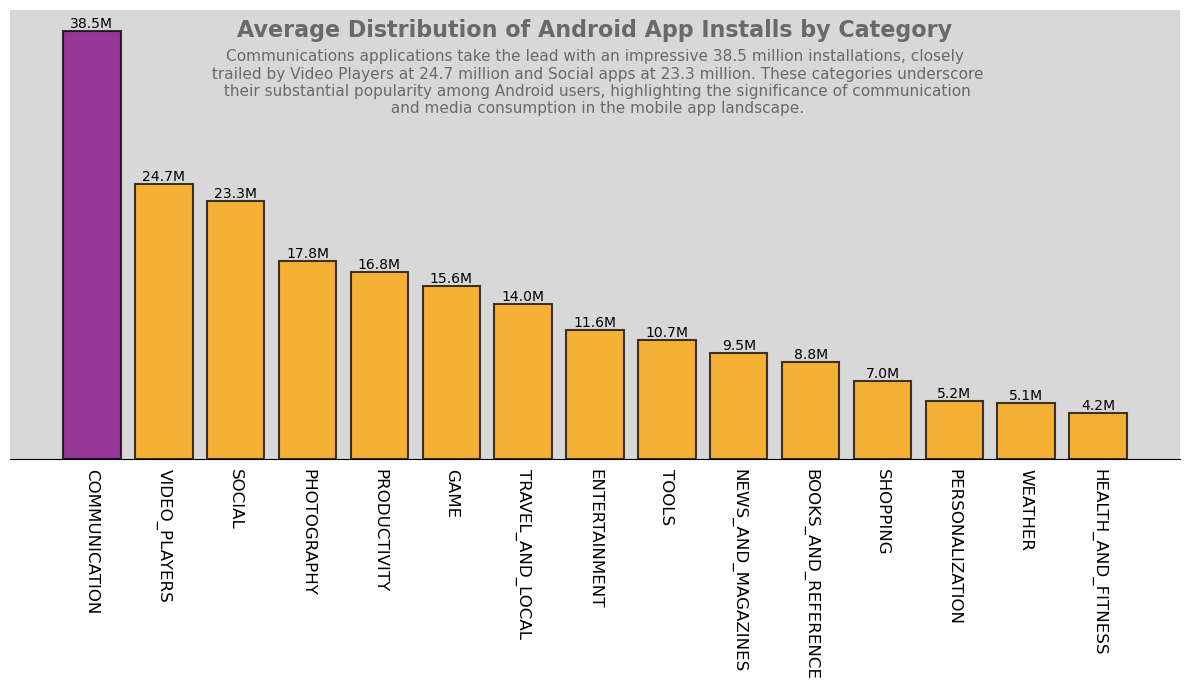

In [56]:
# Data
categories = categories_installs.index[:15]
counts = categories_installs.values[:15]

# Create stylish bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(categories, counts, color="orange", alpha=0.75, edgecolor="black", linewidth=1.5)

plt.xticks(rotation=-90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle="")
plt.xticks(fontsize=12)  # Customized tick labels
plt.yticks(range(0, 6000000, 10000000), [], fontsize=12)  # Customized tick labels a
plt.tick_params(bottom=0, left=0)

# Find the category with the highest count
max_count_category = categories[counts.argmax()]

# Highlight the bar for the category with the highest count
max_count_index = list(categories).index(max_count_category)
bars[max_count_index].set_color("purple")
bars[max_count_index].set_edgecolor('black')

# Adding data labels and percentages inside each bar
for bar, units in zip(bars, categories_installs_unit):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 25, units, ha="center", va="bottom", fontsize=10)

# Adding a background color
ax = plt.gca()
ax.set_facecolor("#d8d8d8")

# Adding chart title inside the chart
plt.text(0.5, 0.94, "Average Distribution of Android App Installs by Category", horizontalalignment='center', fontsize=16,
         transform=plt.gca().transAxes, color='dimgrey', fontweight='bold')

# Adding a conclusion inside the chart
plt.text(0.5, 0.77, '''Communications applications take the lead with an impressive 38.5 million installations, closely\n trailed by Video Players at 24.7 million and Social apps at 23.3 million. These categories underscore\n their substantial popularity among Android users, highlighting the significance of communication\n and media consumption in the mobile app landscape.''',
         horizontalalignment="center", fontsize=11, transform=plt.gca().transAxes, color='dimgrey')

# Removing spines
for i in ["top", "right", "left"]:
    plt.gca().spines[i].set_visible(False)

plt.tight_layout()  # adjust layout to prevent clipping

plt.show()


In [57]:
android_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [58]:
category_group = android_final.groupby("Category")

In [59]:
COMMUNICATION = category_group.get_group("COMMUNICATION").sort_values(by="Installs_int", ascending = False)
COMMUNICATION.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int
336,WhatsApp Messenger,COMMUNICATION,4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
464,Hangouts,COMMUNICATION,4,3419513,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,1000000000
411,Google Chrome: Fast & Secure,COMMUNICATION,4,9643041,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1000000000
391,Skype - free IM & video calls,COMMUNICATION,4,10484169,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1000000000


In [60]:
# to check actual value insights
def alphanummeric_units(value):
    if value >= 1e9:
        return f'{value / 1e9:.0f}B' # 0f means 0 fraction value
    elif value >= 1e6:
        return f'{value / 1e6:.0f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.0f}K'
    else:
        return f'{value:.0f}'

In [61]:
categories_installs.index[:15]

Index(['COMMUNICATION', 'VIDEO_PLAYERS', 'SOCIAL', 'PHOTOGRAPHY',
       'PRODUCTIVITY', 'GAME', 'TRAVEL_AND_LOCAL', 'ENTERTAINMENT', 'TOOLS',
       'NEWS_AND_MAGAZINES', 'BOOKS_AND_REFERENCE', 'SHOPPING',
       'PERSONALIZATION', 'WEATHER', 'HEALTH_AND_FITNESS'],
      dtype='object', name='Category')

In [62]:
df = COMMUNICATION[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanummeric_units)
df

,App,Installs_int,Installs_int_unit
336,WhatsApp Messenger,1000000000,1B
382,Messenger – Text and Video Chat for Free,1000000000,1B
464,Hangouts,1000000000,1B
411,Google Chrome: Fast & Secure,1000000000,1B
391,Skype - free IM & video calls,1000000000,1B
451,Gmail,1000000000,1B
403,LINE: Free Calls & Messages,500000000,500M
4676,Viber Messenger,500000000,500M
420,UC Browser - Fast Download Private & Secure,500000000,500M
371,Google Duo - High Quality Video Calls,500000000,500M


In [63]:
# now checking 2nd category

df = category_group.get_group("VIDEO_PLAYERS").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanummeric_units)
df

,App,Installs_int,Installs_int_unit
3665,YouTube,1000000000,1B
3687,Google Play Movies & TV,1000000000,1B
3711,MX Player,500000000,500M
3675,VLC for Android,100000000,100M
4688,VivaVideo - Video Editor & Photo Movie,100000000,100M
4032,Dubsmash,100000000,100M
10647,Motorola FM Radio,100000000,100M
4696,"VideoShow-Video Editor, Video Maker, Beauty Ca...",100000000,100M
3672,Motorola Gallery,100000000,100M
3691,Samsung Video Library,50000000,50M


In [64]:
# now checking 3rd category

df = category_group.get_group("SOCIAL").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanummeric_units)
df

,App,Installs_int,Installs_int_unit
2544,Facebook,1000000000,1B
2554,Google+,1000000000,1B
2604,Instagram,1000000000,1B
2610,Snapchat,500000000,500M
2546,Facebook Lite,500000000,500M
3945,Tik Tok - including musical.ly,100000000,100M
2592,Tango - Live Video Broadcast,100000000,100M
6373,VK,100000000,100M
2552,Pinterest,100000000,100M
3951,BIGO LIVE - Live Stream,100000000,100M


In [65]:
# now checking 4TH category

df = category_group.get_group("PHOTOGRAPHY").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanummeric_units)
df

,App,Installs_int,Installs_int_unit
2884,Google Photos,1000000000,1B
4574,"S Photo Editor - Collage Maker , Photo Collage",100000000,100M
2949,Camera360: Selfie Photo Editor with Funny Sticker,100000000,100M
2908,Retrica,100000000,100M
8307,LINE Camera - Photo editor,100000000,100M
2921,Photo Editor Pro,100000000,100M
2847,"Sweet Selfie - selfie camera, beauty cam, phot...",100000000,100M
2937,BeautyPlus - Easy Photo Editor & Selfie Camera,100000000,100M
2938,PicsArt Photo Studio: Collage Maker & Pic Editor,100000000,100M
5057,AR effect,100000000,100M


In [70]:
# now checking 4TH category

df = category_group.get_group("TOOLS").sort_values(by="Installs_int", ascending = False)
df = df[["App", "Installs_int"]].head(15)
df["Installs_int_unit"] = df["Installs_int"].map(alphanummeric_units)
df

,App,Installs_int,Installs_int_unit
3234,Google,1000000000,1B
3265,Gboard - the Google Keyboard,500000000,500M
3255,SHAREit - Transfer & Share,500000000,500M
4005,Clean Master- Space Cleaner & Antivirus,500000000,500M
3235,Google Translate,500000000,500M
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000,500M
8452,Automatic Call Recorder,100000000,100M
3266,Google Korean Input,100000000,100M
7550,Battery Doctor-Battery Life Saver & Battery Co...,100000000,100M
3272,Share Music & Transfer Files - Xender,100000000,100M


# <span style="background-color: #E6E6FA; color: black;"> Analysis of Photography Category and Potential for Photo Generation App in 2024

<span style="background-color: #E6E6FA; color: black; font-size: medium;">**Conclusion**</span>


Based on the analysis of the average distribution of Android app installs by category, it is evident that the "Communication" category, led by the giant app YouTube, stands out with a staggering 38.5 million installs. While this category is lucrative, it is essential to consider the dominance of specific apps within subcategories. Given the significant presence of YouTube in the "Communication" category, it may be strategic to explore emerging categories with growth potential, especially in alignment with future trends in artificial intelligence (AI).

As we look towards the future, developing an app in the "PHOTOGRAPHY" or "Tools" category could be a promising avenue. These categories often witness increased demand for innovative applications that harness AI capabilities to enhance user efficiency and task management. By focusing on AI-driven features and functionalities, developers can tap into the evolving landscape of technology and provide users with cutting-edge solutions. AI can also facilitate innovative functionalities such as automated photo organization, intelligent tagging, and even the generation of creative content suggestions. These advancements are expected to streamline the photo management process and provide users with new avenues for expressing their creativity.

Choosing a category with growth potential in the realm of AI ensures that the app aligns with future requirements and stands a chance to become a significant player without intense competition from existing giants. This strategic approach not only positions the app for potential success but also enhances its attractiveness for Google AdSense account monetization, offering a platform for sustainable earnings.
